In [6]:
import numpy as np
from ase import io

import matplotlib.pyplot as plt

from MDAnalysis import Universe
from MDAnalysis import transformations as trans

from WatAnalysis.spectrum import InterfaceVelocityACF, calc_power_spectrum, calc_full_vacf

In [2]:
topo = "coord.xyz"
pos_traj = "pos_traj.xyz"
vel_traj = "vel_traj.xyz"

u_pos = Universe(topo, pos_traj, topology_format="XYZ", format="XYZ")
u_vel = Universe(topo, vel_traj, topology_format="XYZ", format="XYZ")
atoms = io.read(topo)
transform = trans.boxdimensions.set_dimensions(atoms.cell.cellpar())
u_pos.trajectory.add_transformations(transform)

In [87]:
# velocities = np.zeros((len(u_vel.trajectory), len(u_vel.select_atoms("name H")), 3))

# for ts in u_vel.trajectory:
#     # print(ts.frame)
#     # print(u_vel.select_atoms("name H").positions[0])
#     np.copyto(velocities[ts.frame], u_vel.select_atoms("name H").positions)

In [88]:
# full_vacf = calc_full_vacf(velocities)
# power_spectrum = calc_power_spectrum(full_vacf, 0.5e-3 * 10)

In [3]:
# plt.plot(full_vacf)

# plt.xlim(10000.-1, 10011.)

In [4]:
# mask = power_spectrum[0] > 0.

# plt.plot(power_spectrum[0][mask] * 100. / 3., power_spectrum[1][mask])
# plt.xlim(0., 3500)
# plt.ylim(bottom=0.)
# plt.show()

In [5]:
metal_ids = np.where(atoms.symbols == "Pt")[0]
surf_ids = [metal_ids[:16], metal_ids[-16:]]

obj = InterfaceVelocityACF(universe_pos=u_pos, universe_vel=u_vel, surf_ids=surf_ids, max_tau=100, d_tau=1, interval=None)
# [0., 4.5]
obj.run()

/Users/jxzhu/workspace/software/WatAnalysis/WatAnalysis/multitrajbase.py:93: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = all_ts[0].time


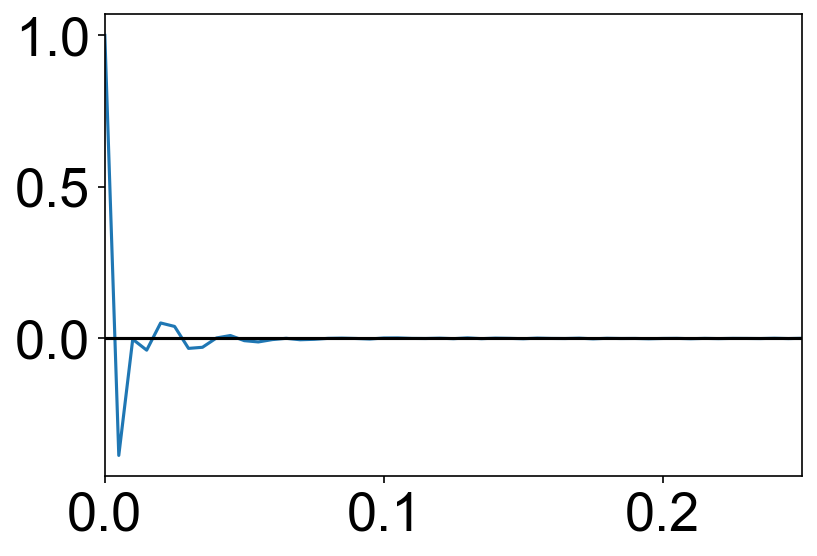

In [11]:
vacf = np.array(obj.results.vacf)
vacf = vacf / vacf.max()
ts = np.array(obj.tau_list) * 0.5 * 1e-3 * 10

plt.plot(ts, vacf)

plt.xlim(0., ts.max() / 2)

plt.axhline(y=0.)

plt.show()

In [12]:
full_vacf = np.concatenate([vacf[::-1][:-1], vacf])

In [13]:
out = calc_power_spectrum(full_vacf, 0.5 * 1e-3 * 10)

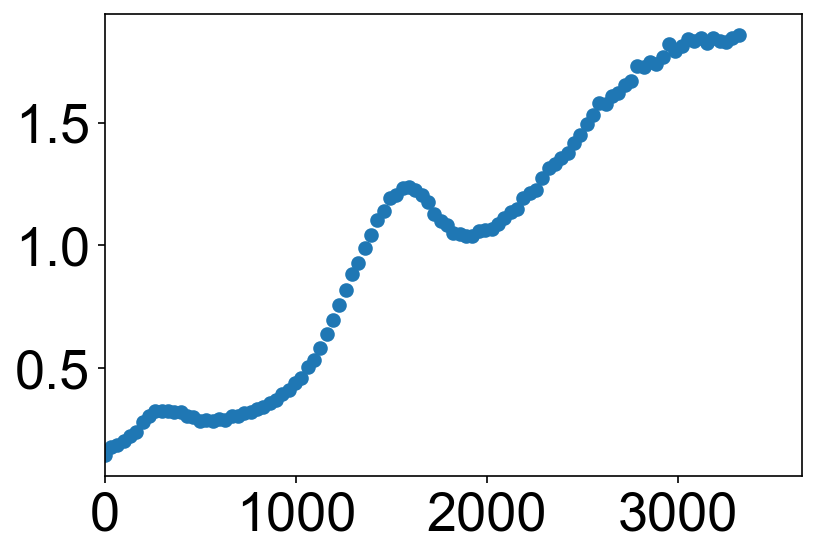

In [14]:
plt.scatter(out[0] * 100 / 3., out[1])

plt.xlim(left=0.)
plt.show()